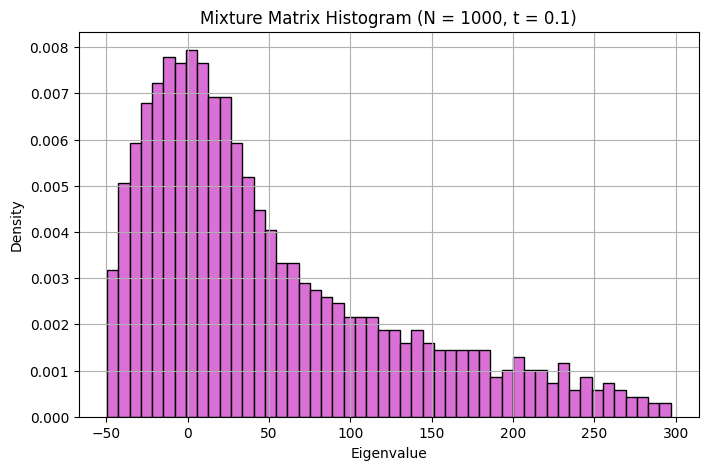

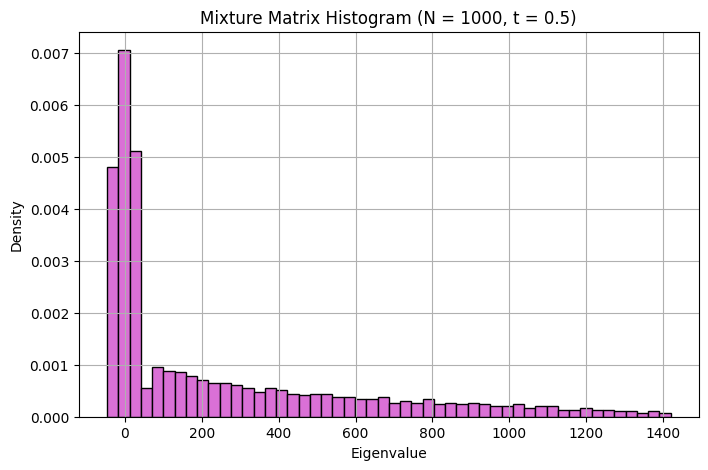

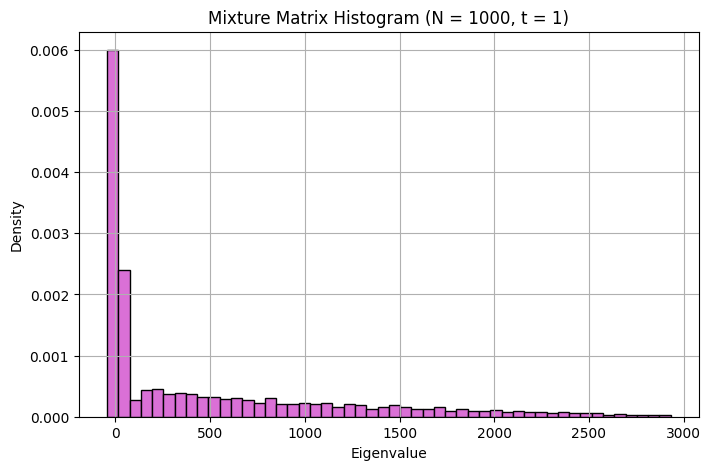

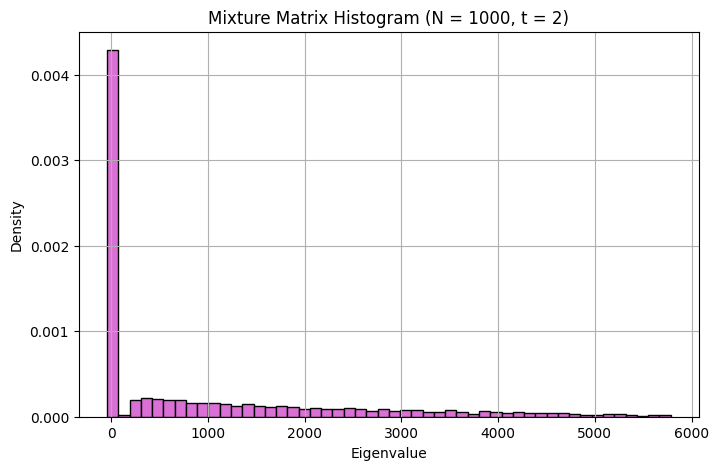

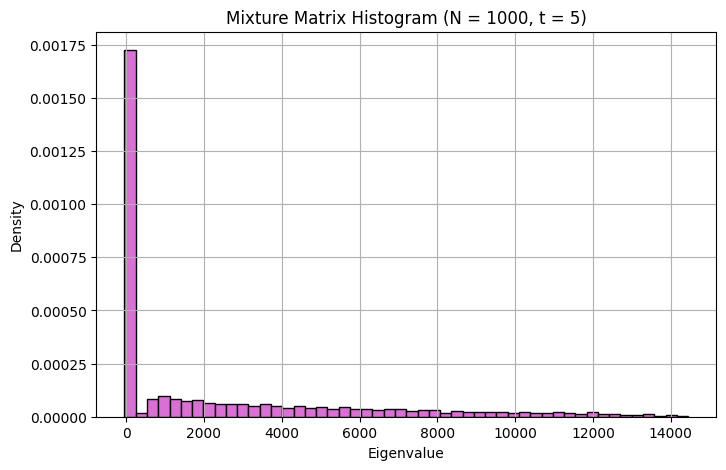

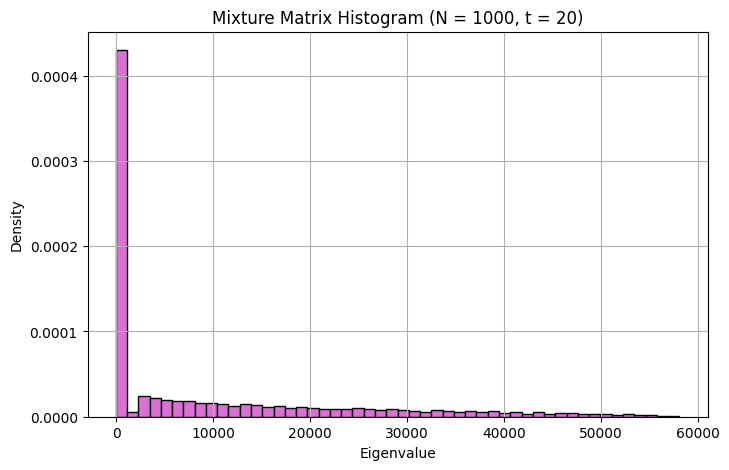

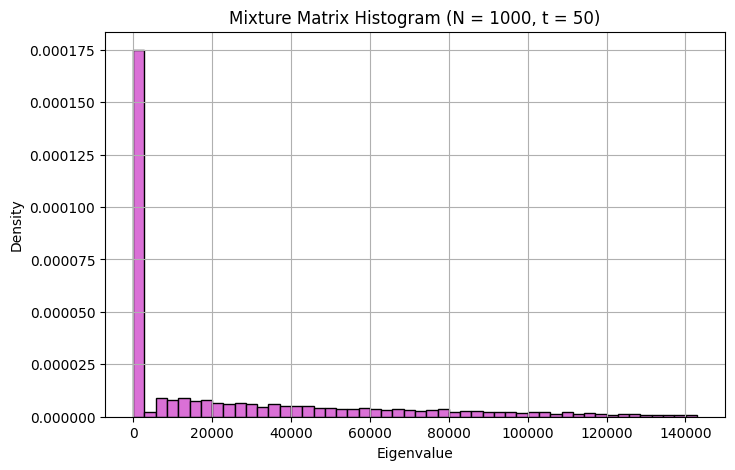

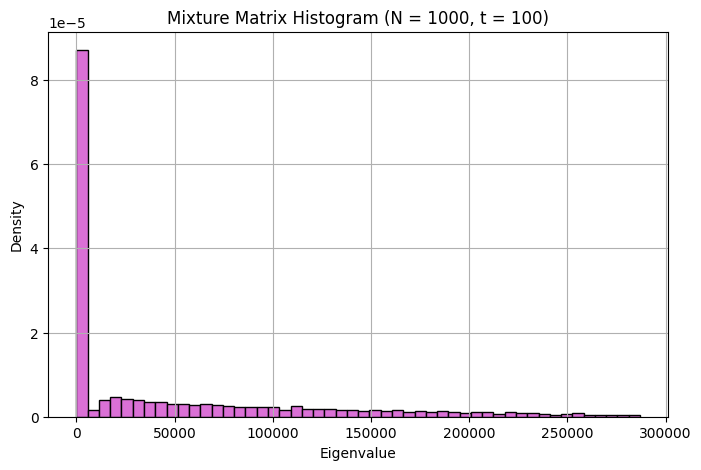

In [4]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)  # For reproducibility

def generate_gaussian_matrix(N):
    """
    Generates a symmetric Gaussian matrix of size N x N.
    A = (B + B.T) / sqrt(2) where B ~ N(0, 1)
    """
    B = np.random.randn(N, N)
    A = (B + B.T) / np.sqrt(2)
    return A

def generate_wishart_matrix(N, alpha=0.5):
    """
    Generates a Wishart matrix A = B Bᵀ of size (M x M), where M = alpha * N
    """
    M = int(alpha * N)
    B = np.random.randn(M, N)
    A = B @ B.T
    return A

def plot_mixture_eigen_histogram(N, t_values, alpha=0.5):
    """
    Plots eigenvalue histograms of matrices formed by:
    A_mix = Gaussian_matrix + t * Wishart_matrix
    for different values of t.
    """
    for t in t_values:
        # Generate matrices
        A_g = generate_gaussian_matrix(N)
        A_w = generate_wishart_matrix(N, alpha=alpha)
        
        # Resize A_w to match A_g shape
        if A_w.shape != (N, N):
            # Pad Wishart matrix with zeros or use top-left N x N
            A_w_resized = np.zeros((N, N))
            min_dim = min(N, A_w.shape[0])
            A_w_resized[:min_dim, :min_dim] = A_w[:min_dim, :min_dim]
            A_w = A_w_resized

        # Combine
        A_mix = A_g + t * A_w

        # Eigenvalues
        eigenvalues = np.linalg.eigvalsh(A_mix)

        # Plot
        plt.figure(figsize=(8, 5))
        plt.hist(eigenvalues, bins=50, density=True, color='orchid', edgecolor='black')
        plt.title(f'Mixture Matrix Histogram (N = {N}, t = {t})')
        plt.xlabel('Eigenvalue')
        plt.ylabel('Density')
        plt.grid(True)
        plt.show()

# Run for a fixed N, and test different t values
N = 1000  # You can also try with 1000
t_values = [0.1, 0.5, 1, 2, 5,20,50,100]

plot_mixture_eigen_histogram(N, t_values)
